# Tarea 3
### Especialidad en Estadistica Aplicada
### Mateo Orozco Baldovino

## La informacion de la tarea puede ser encontrada en el siguiente repositorio:
https://github.com/TheMaorba/DataMining/tree/main/Tarea3

### *Variables del dataset bancario:*
- age: edad del cliente.
- job: tipo de ocupación laboral.
- marital: estado civil.
- education: nivel educativo alcanzado.
- default: tiene créditos en mora.
- balance: saldo promedio anual en la cuenta.
- housing: tiene crédito hipotecario.
- loan: tiene crédito personal.
- contact: medio de contacto utilizado.
- day: día del mes del último contacto.
- month: mes del último contacto.
- duration: duración de la última llamada (segundos).
- campaign: número de contactos en la campaña actual.
- pdays: días desde el último contacto previo.
- previous: contactos realizados antes de la campaña actual.
- poutcome: resultado de la campaña anterior.
- y: se suscribió o no al depósito a término.

In [1]:
from sklearn.preprocessing import StandardScaler

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import os
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv(r"D:\Documentos\Especialidad\DataMining\Tarea2\Dataset\bank.csv", sep=";")
data.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [2]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
# Se eliminan las otras columnas
data = data.drop(columns=['job','marital','education','default','housing','loan','contact','month','poutcome','y'])
columnas_numericas = [
    'age', 'balance', 'campaign', 'duration']
# Se seleccionan 4 columnas numericas que nos indican: La edad, el saldo promedio anual en la cuenta, numero de contactos en que fueron realizados en la campaña y la duracion de la ultima llamada.

# Histograma

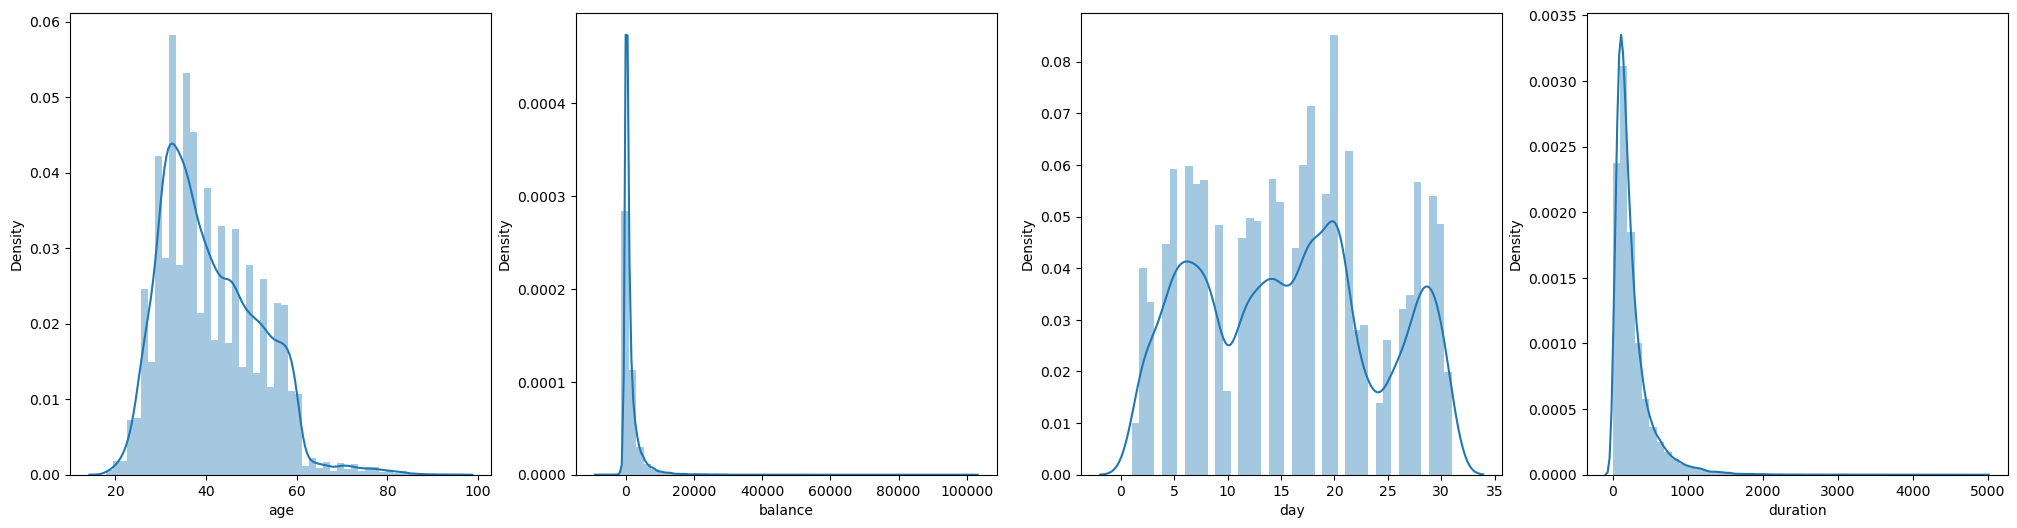

In [5]:
# Histogram 
cols=data.columns
N=len(cols)
plt.figure(figsize=(25,6))
plt.subplot(141)
sns.distplot(a=data[cols[0]], hist=True)
plt.subplot(142)
sns.distplot(a=data[cols[1]], hist=True)
plt.subplot(143)
sns.distplot(a=data[cols[2]], hist=True)
plt.subplot(144)
sns.distplot(a=data[cols[3]], hist=True, norm_hist=True)
plt.show()

La gráfica presenta cuatro distribuciones de densidad para las variables edad, balance, día y duración, revelando patrones clave en el comportamiento de los datos. La edad muestra una concentración entre los 30 y 40 años con una caída progresiva hacia edades mayores, mientras que el balance está fuertemente sesgado a la derecha, con la mayoría de los valores cercanos a cero y una cola larga hacia balances altos. La variable día exhibe una distribución multimodal con picos en días específicos como el 5, 10, 15, 20 y 25, lo que sugiere actividad recurrente. Por último, la duración también está sesgada a la derecha, indicando que la mayoría de las llamadas son breves, aunque existen casos de duración considerable.

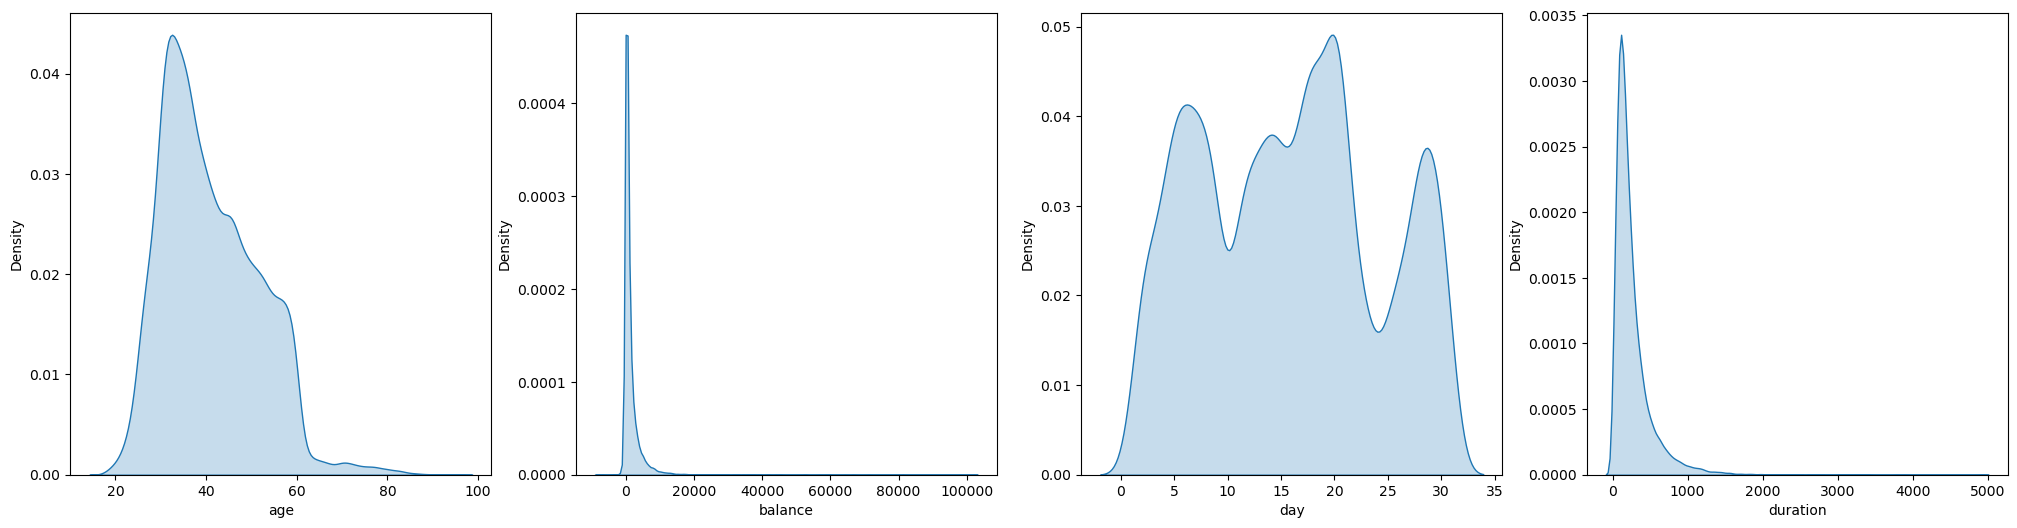

In [6]:
# Histogram 
cols=data.columns
N=len(cols)
plt.figure(figsize=(25,6))
plt.subplot(141)
sns.kdeplot(data=data[cols[0]], shade=True)
plt.subplot(142)
sns.kdeplot(data=data[cols[1]], shade=True)
plt.subplot(143)
sns.kdeplot(data=data[cols[2]], shade=True)
plt.subplot(144)
sns.kdeplot(data=data[cols[3]], shade=True)
plt.show()

La gráfica presenta cuatro distribuciones de densidad para las variables edad, balance, día y duración, revelando patrones clave en el comportamiento de los datos. La edad muestra una distribución sesgada a la derecha con un pico entre los 30 y 35 años, mientras que el balance está fuertemente concentrado cerca de cero, con valores extremos que alcanzan hasta 100,000. La variable día exhibe una distribución multimodal, lo que sugiere que ciertos días tienen mayor actividad o relevancia. Por último, la duración también está sesgada a la derecha, con la mayoría de los valores cercanos a cero y una cola larga que se extiende hasta 5000, indicando que las llamadas largas son menos frecuentes pero posibles.

# 2D KDE plot

<Figure size 800x600 with 0 Axes>

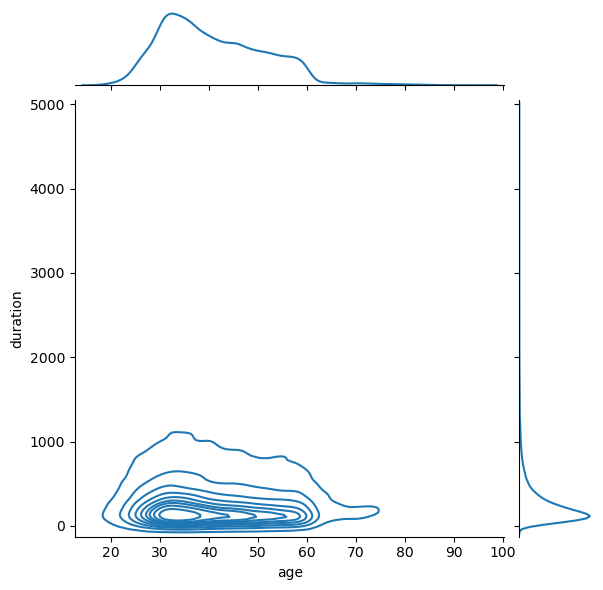

In [7]:
# 2D KDE plot
# Kernel Density Estimation
plt.figure(figsize=(8,6))
sns.jointplot(x=data['age'], y=data['duration'], kind="kde")
plt.show()

La gráfica muestra una relación entre edad y duración de llamadas mediante un gráfico de contorno con histogramas marginales, revelando que la mayor concentración de datos se encuentra entre los 30 y 50 años de edad y duraciones de llamada entre 0 y 1000 segundos. Las líneas de contorno indican zonas de alta densidad, lo que sugiere que los individuos en ese rango de edad tienden a realizar llamadas de duración moderada. Los histogramas laterales refuerzan esta observación al mostrar distribuciones centradas en esos rangos. Este análisis sugiere una correlación entre edad adulta y mayor actividad telefónica en términos de duración.

In [8]:
data["age"].value_counts()

age
32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: count, Length: 77, dtype: int64

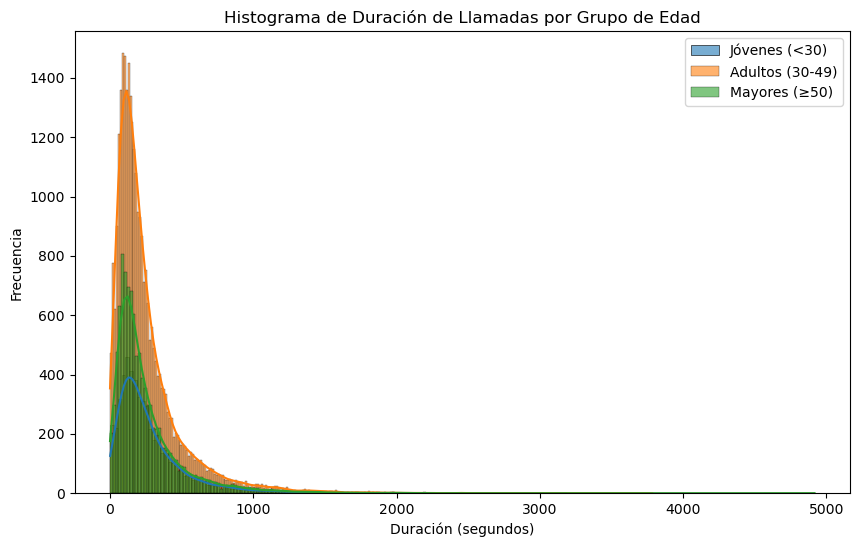

In [9]:
# Histogramas por grupos de edad
plt.figure(figsize=(10, 6))

# Crear grupos de edad
jovenes = data[data["age"] < 30]
adultos = data[(data["age"] >= 30) & (data["age"] < 50)]
mayores = data[data["age"] >= 50]

# Graficar duración de llamadas para cada grupo
sns.histplot(data=jovenes['duration'], label="Jóvenes (<30)", kde=True, alpha=0.6)
sns.histplot(data=adultos['duration'], label="Adultos (30-49)", kde=True, alpha=0.6)
sns.histplot(data=mayores['duration'], label="Mayores (≥50)", kde=True, alpha=0.6)

plt.title("Histograma de Duración de Llamadas por Grupo de Edad")
plt.xlabel("Duración (segundos)")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()

La gráfica muestra un histograma de duración de llamadas segmentado por grupo de edad, donde se observa que la mayoría de las llamadas son de corta duración, especialmente entre los adultos (30–49 años), representados en naranja. Este grupo domina en frecuencia en los primeros segundos del eje X, seguido por los mayores (≥50 años, en verde) y los jóvenes (<30 años, en azul). A medida que la duración aumenta, la frecuencia disminuye en todos los grupos, lo que indica una tendencia general hacia llamadas breves. El análisis sugiere que los adultos realizan más llamadas cortas que los demás grupos, lo que podría reflejar patrones de comunicación más frecuentes pero menos prolongados.

In [10]:
# https://medium.com/the-researchers-guide/finding-the-best-distribution-that-fits-your-data-using-pythons-fitter-library-319a5a0972e9
from fitter import Fitter, get_common_distributions, get_distributions

In [11]:
# Extraer cada columna como array numpy
age = data["age"].values
balance = data["balance"].values
day = data["day"].values
duration = data["duration"].values
campaign = data["campaign"].values
pdays = data["pdays"].values
previous = data["previous"].values
age

array([58, 44, 33, ..., 72, 57, 37], dtype=int64)

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gamma,0.012744,1124.102466,1150.259753,inf,0.050666,2.634344e-101
beta,0.012747,1149.547095,1184.423477,inf,0.053055,4.792051e-111
lognorm,0.012846,1104.741346,1130.898634,inf,0.051175,2.419939e-103
burr,0.013197,1064.267717,1099.144100,inf,0.059380,5.159886e-139
norm,0.014944,1313.284550,1330.722741,inf,0.095982,0.000000e+00


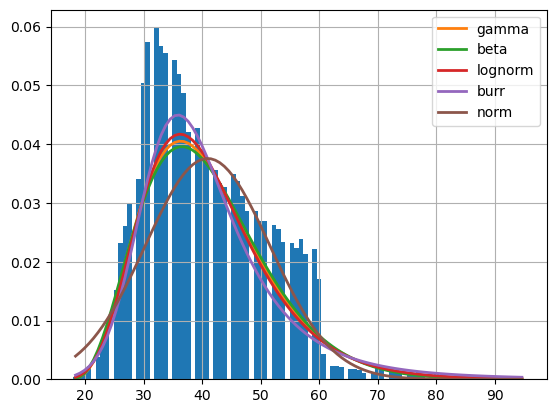

In [12]:
f = Fitter(age,distributions=['gamma','lognorm',"beta","burr","norm"])
f.fit()
f.summary()

La gráfica muestra un histograma de datos empíricos sobre el cual se han ajustado cinco distribuciones teóricas: gamma (naranja), beta (verde), log-normal (morado), burr (marrón) y normal (rojo oscuro). Visualmente, la distribución beta y la burr parecen adaptarse mejor a la forma del histograma, capturando tanto la concentración central como la dispersión en los extremos. La log-normal y la gamma ofrecen ajustes razonables pero menos precisos en las colas, mientras que la normal no refleja adecuadamente la asimetría observada. Este análisis sugiere que los datos presentan una distribución sesgada, y que modelos como beta o burr podrían ser más adecuados para representarlos.

In [13]:
f.get_best(method = 'sumsquare_error')

{'gamma': {'a': 5.370062127696125,
  'loc': 16.12093330233502,
  'scale': 4.621042863306757}}

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gamma,0.012744,1124.102466,1150.259753,inf,0.050666,2.634344e-101
lognorm,0.012846,1104.741346,1130.898634,inf,0.051175,2.419939e-103
rayleigh,0.013403,1106.166979,1123.605170,inf,0.085482,7.214947e-288
exponpow,0.014816,1488.656138,1514.813425,inf,0.080669,2.295200e-256
norm,0.014944,1313.284550,1330.722741,inf,0.095982,0.000000e+00


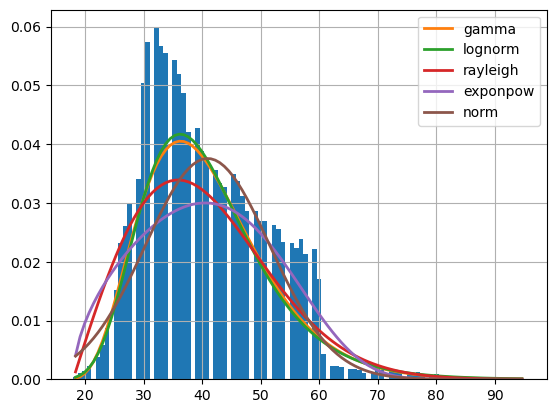

In [14]:
f = Fitter(age, distributions= get_common_distributions())
f.fit()
f.summary()

La gráfica presenta un histograma de datos distribuidos entre 20 y 90, sobre el cual se han ajustado cinco distribuciones teóricas: gamma, log-normal, rayleigh, exponencial potenciada y normal. Visualmente, la distribución gamma (naranja) y la log-normal (verde) parecen seguir mejor la forma del histograma, especialmente en las zonas de mayor densidad. La rayleigh (roja) y la exponencial potenciada (morada) muestran desviaciones más notables, mientras que la normal (marrón) no captura adecuadamente la asimetría de los datos. Este análisis sugiere que los datos tienen una distribución sesgada, y que modelos como gamma o log-normal ofrecen un ajuste más representativo.

In [15]:
import numpy as np
mu, sigma = 0, 0.1 # mean and standard deviation

data = np.random.normal(mu, sigma, 10000)
data

array([ 0.11855841,  0.07544938,  0.07016645, ...,  0.06049338,
       -0.18176757,  0.00358326])

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gamma,1.634200,284.850887,306.481908,inf,0.008225,5.053469e-01
lognorm,1.634524,286.021103,307.652124,inf,0.007712,5.888753e-01
norm,1.655085,281.291355,295.712036,inf,0.009409,3.366983e-01
chi2,1.934352,299.144536,320.775557,inf,0.012832,7.363120e-02
exponpow,20.141723,507.827210,529.458231,inf,0.064419,1.602834e-36


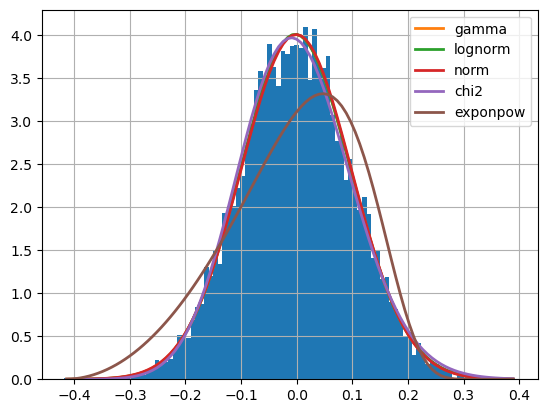

In [16]:
f = Fitter(data,
           distributions= get_common_distributions())
f.fit()
f.summary()

La gráfica muestra un histograma de datos centrados entre −0.4 y 0.4, sobre el cual se han ajustado cinco distribuciones teóricas: gamma, log-normal, normal, chi-cuadrado y exponencial potenciada. Visualmente, la distribución normal (roja) parece ofrecer el mejor ajuste, ya que el histograma es simétrico y centrado, mientras que la gamma y la exponencial potenciada también se aproximan bien en ciertas regiones. En cambio, la log-normal y la chi-cuadrado presentan sesgos que no reflejan adecuadamente la forma del histograma. Este análisis sugiere que la normal es la candidata más adecuada para modelar estos datos.

In [18]:
from scipy.stats import shapiro

# =========================================
# 2) Cargar dataset bank.csv
#    (autodetecta el separador con engine='python')
# =========================================
data = pd.read_csv(r"D:\Documentos\Especialidad\DataMining\Tarea2\Dataset\bank.csv", sep=";")

display(data.head())
print("Dimensión del dataset:", data.shape)
print("Columnas:", data.columns.tolist())

# =========================================
# 3) Selección de variables numéricas
#    (Shapiro aplica a variables continuas/cuantitativas)
# =========================================
num_cols = data.select_dtypes(include="number").columns.tolist()
print("\nColumnas numéricas:", num_cols)

# Elegir 1-2 columnas para la prueba (puedes cambiar estas)
cols_to_test = ["balance", "duration"]  # Ejemplo común en este dataset
# Nota: duration suele ser muy sesgada en datasets de marketing/llamadas.

# =========================================
# 4) Función auxiliar: Shapiro + reporte
#    Importante: Shapiro es sensible a n grande.
#    Para n > 5000, se recomienda muestrear (p. ej. 5000) para que sea ejecutable y comparable.
# =========================================
def shapiro_report(data: pd.Series, alpha: float = 0.05, max_n: int = 5000, random_state: int = 42):
    x = data.dropna().values

    # Si el dataset es grande, muestreamos para aplicar Shapiro
    if len(x) > max_n:
        rng = np.random.default_rng(random_state)
        x = rng.choice(x, size=max_n, replace=False)

    stat, pvalue = shapiro(x)

    decision = "Rechazar H0 (no normal)" if pvalue < alpha else "No rechazar H0 (compatible con normalidad)"
    return {
        "n_usado": len(x),
        "W": stat,
        "p_value": pvalue,
        "alpha": alpha,
        "decision": decision
    }

# =========================================
# 5) Prueba de hipótesis (Shapiro-Wilk)
# =========================================
# Hipótesis:
# H0: La variable proviene de una distribución Normal.
# H1: La variable NO proviene de una distribución Normal.

results = []
for c in cols_to_test:
    r = shapiro_report(data[c], alpha=0.05, max_n=5000, random_state=42)
    r["variable"] = c
    results.append(r)

results_df = pd.DataFrame(results)[["variable", "n_usado", "W", "p_value", "alpha", "decision"]]
display(results_df)

# =========================================
# 6) Análisis breve en el notebook (texto programático)
# =========================================
for _, row in results_df.iterrows():
    print(f"\nVariable: {row['variable']}")
    print(f"- n usado en Shapiro: {row['n_usado']}")
    print(f"- Estadístico W: {row['W']:.6f}")
    print(f"- p-value: {row['p_value']:.6e}")
    print(f"- Decisión (alpha={row['alpha']}): {row['decision']}")


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Dimensión del dataset: (45211, 17)
Columnas: ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']

Columnas numéricas: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


,variable,n_usado,W,p_value,alpha,decision
0,balance,5000,0.507889,8.333891e-80,0.05,Rechazar H0 (no normal)
1,duration,5000,0.727709,1.469265e-67,0.05,Rechazar H0 (no normal)



Variable: balance
- n usado en Shapiro: 5000
- Estadístico W: 0.507889
- p-value: 8.333891e-80
- Decisión (alpha=0.05): Rechazar H0 (no normal)

Variable: duration
- n usado en Shapiro: 5000
- Estadístico W: 0.727709
- p-value: 1.469265e-67
- Decisión (alpha=0.05): Rechazar H0 (no normal)


## Análisis de normalidad (Shapiro–Wilk)

Se aplicó la prueba de Shapiro–Wilk a las variables **balance** y **duration** usando un tamaño de muestra `n_usado = 5000` y un nivel de significancia `alpha = 0.05`. 

### Hipótesis
- **H0:** La variable proviene de una distribución normal. 
- **H1:** La variable no proviene de una distribución normal. 

### Resultados
- **balance:** `W = 0.507889`, `p-value = 8.33e-80` → **Rechazar H0** (no normal). 
- **duration:** `W = 0.727709`, `p-value = 1.47e-67` → **Rechazar H0** (no normal). 

### Conclusión
Como `p-value < 0.05` en ambas variables, existe evidencia estadística suficiente para concluir que **balance** y **duration** no siguen una distribución normal en su escala original. 


In [ ]:
# !jupyter nbconvert --to html "Tarea3.ipynb"
# !jupyter nbconvert --to slides "Tarea3.ipynb"

[NbConvertApp] Converting notebook Tarea3.ipynb to slides
[NbConvertApp] Writing 816164 bytes to Tarea3.slides.html
